In [1]:
import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt
import BOPackage

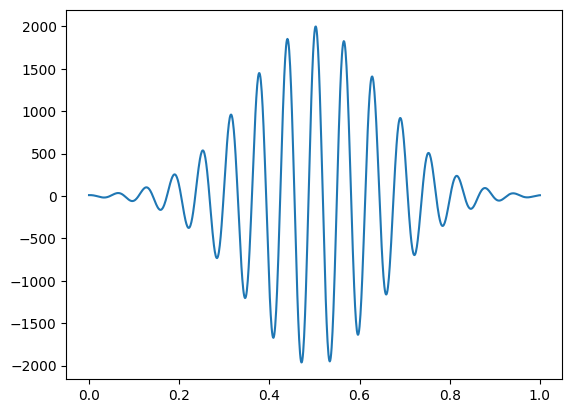

In [2]:
def ObjectiveFunction(x):
    x_centre = 0.5
    FWHM = 0.3
    width = FWHM / (2 * np.log(2))

    spatial_intensity =  np.exp(- ((x - x_centre) / width)**2)

    return 2000 * np.cos(100 * x) * spatial_intensity

X = np.linspace(0, 1, 1001, endpoint=True)

plt.plot(X, ObjectiveFunction(X))

In [3]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scale = 0.04

AcquisitionFunction = BOPackage.UCB
max_kappa = 10
min_kappa = 0.1

bounds = np.array([[0, 1]])
n_samples = 10

In [4]:
bo = BOPackage.BO(KernelFunction=BOPackage.RBF_Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=BOPackage.UCB, 
                  max_kappa=max_kappa, 
                  min_kappa=min_kappa,
                  bounds=bounds, 
                  n_samples=n_samples,
                  #log_path=log_path,
                  random_seed=78)

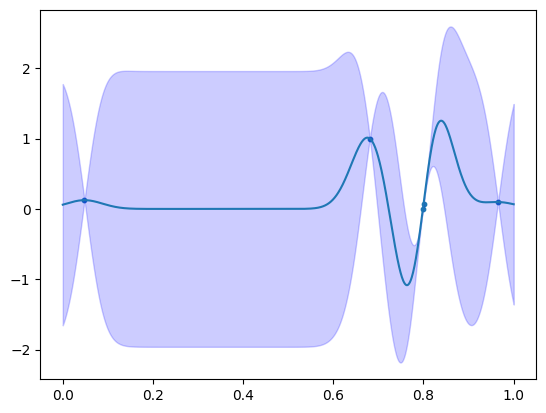

In [5]:
raw_X = bo.GetRandomXBatch(batch_size=5)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

candidate_x = X.reshape([len(X), 1])
mean, variance = bo.PredictMeanVariance(candidate_x)

plt.plot(X, mean)

shifted_y_data = bo.y_data - np.min(bo.y_data)
normalised_y_data = shifted_y_data / np.max(shifted_y_data)

plt.scatter(bo.X_data, normalised_y_data, s=10)
plt.fill_between(X, 
                    mean - 1.96 * np.sqrt(variance), 
                    mean + 1.96 * np.sqrt(variance), 
                    color='blue', alpha=0.2, label='95% Confidence Interval'
                    )

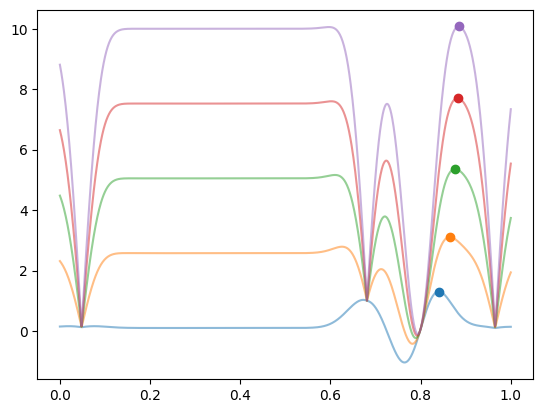

In [6]:
kappas = [min_kappa, min_kappa + (max_kappa - min_kappa) / 4, min_kappa + (max_kappa - min_kappa) / 2, min_kappa + 3 * (max_kappa - min_kappa) / 4, max_kappa]

for i, kappa in enumerate(kappas):
    acq_fn = BOPackage.UCB(mean, np.sqrt(variance), kappa)
    next_Y = np.max(acq_fn)
    next_X = X[np.argmax(acq_fn)]
    max_index = np.argmax(BOPackage.UCB(mean, np.sqrt(variance), kappa))

    plt.plot(X, acq_fn, alpha=0.5, label=f'kappa{i}')
    plt.scatter(next_X, next_Y)

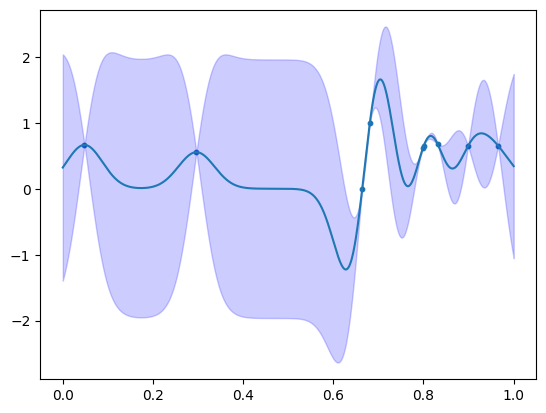

In [7]:
raw_X = bo.GetNextXBatch(batch_size=4)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

candidate_x = X.reshape([len(X), 1])
mean, variance = bo.PredictMeanVariance(candidate_x)

plt.plot(X, mean)

shifted_y_data = bo.y_data - np.min(bo.y_data)
normalised_y_data = shifted_y_data / np.max(shifted_y_data)

plt.scatter(bo.X_data, normalised_y_data, s=10)
plt.fill_between(X, 
                    mean - 1.96 * np.sqrt(variance), 
                    mean + 1.96 * np.sqrt(variance), 
                    color='blue', alpha=0.2, label='95% Confidence Interval'
                    )

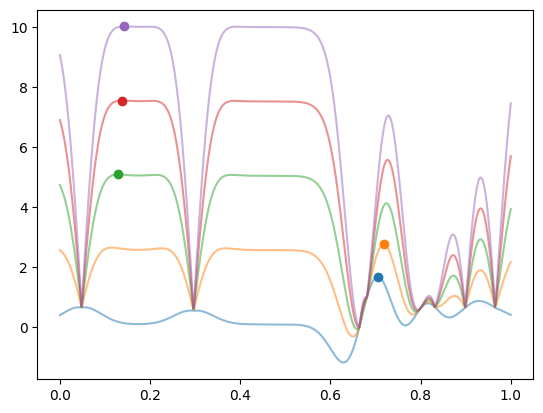

In [8]:
kappas = [min_kappa, min_kappa + (max_kappa - min_kappa) / 4, min_kappa + (max_kappa - min_kappa) / 2, min_kappa + 3 * (max_kappa - min_kappa) / 4, max_kappa]

for i, kappa in enumerate(kappas):
    acq_fn = BOPackage.UCB(mean, np.sqrt(variance), kappa)
    next_Y = np.max(acq_fn)
    next_X = X[np.argmax(acq_fn)]
    max_index = np.argmax(BOPackage.UCB(mean, np.sqrt(variance), kappa))

    plt.plot(X, acq_fn, alpha=0.5, label=f'kappa{i}')
    plt.scatter(next_X, next_Y)

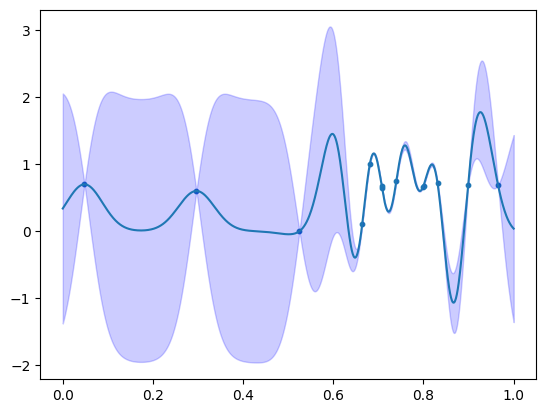

In [9]:
raw_X = bo.GetNextXBatch(batch_size=4)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

candidate_x = X.reshape([len(X), 1])
mean, variance = bo.PredictMeanVariance(candidate_x)

plt.plot(X, mean)

shifted_y_data = bo.y_data - np.min(bo.y_data)
normalised_y_data = shifted_y_data / np.max(shifted_y_data)

plt.scatter(bo.X_data, normalised_y_data, s=10)
plt.fill_between(X, 
                    mean - 1.96 * np.sqrt(variance), 
                    mean + 1.96 * np.sqrt(variance), 
                    color='blue', alpha=0.2, label='95% Confidence Interval'
                    )